<a href="https://colab.research.google.com/github/ogane0112/-AI-/blob/main/%E6%B1%BA%E5%AE%9A%E6%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ダメなやり方例！

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

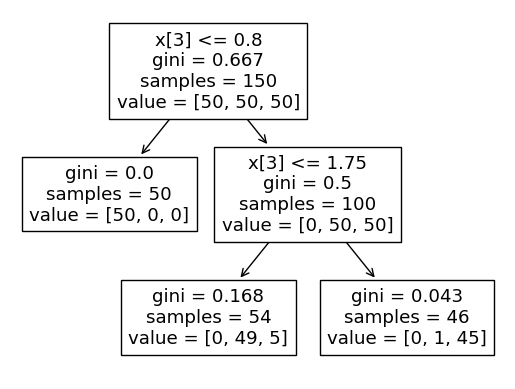

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
model = tree.DecisionTreeClassifier(max_depth= 2,random_state = 0)
xcol = ["sepal length (cm)"	,"sepal width (cm)"	,"petal length (cm)",	"petal width (cm)"]
#特徴量を格納する
ｘ = df[xcol]
#目的変数を格納する
y = df["species"]
model.fit(ｘ,y)

tree.plot_tree(model)

In [8]:
#このやり方はダメです！-->検証用のデータと学習用のデータ分けていない！
model.score(ｘ,y)

0.96

# 良いやり方例

In [ ]:
#データを取得する処理は同じ！
from sklearn.datasets import load_iris
from sklearn import tree
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]
model = tree.DecisionTreeClassifier(max_depth= 2,random_state = 0)
xcol = ["sepal length (cm)"	,"sepal width (cm)"	,"petal length (cm)",	"petal width (cm)"]
#特徴量を格納する
ｘ = df[xcol]
#目的変数を格納する
y = df["species"]　　　　　　Ｆｆｖ

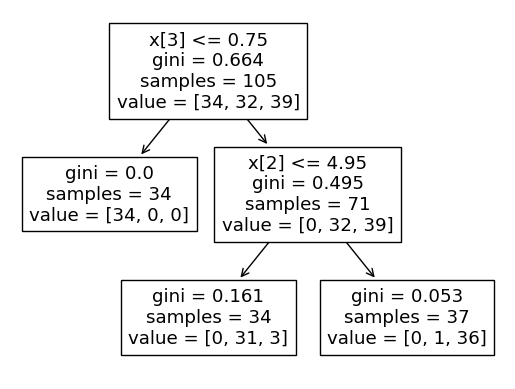

In [11]:
#sklearnを用いてホールドアウト法を実装する！
from sklearn.model_selection import train_test_split
#モデルを保存する用のライブラリ
import pickle
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model.fit(x_train, y_train)
model.score(x_test, y_test)
tree.plot_tree(model)
#モデルを保存する処理
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

この決定木の画像は、Irisデータセットを使って分類モデルを構築した結果です。この決定木は、Irisデータセットの花を3種類（Setosa、Versicolor、Virginica）に分類するために使われています。以下に、この決定木の各ノードについて説明します。

ルートノード:

x[3] <= 0.75: これは特徴量の1つ、具体的には「petal width (cm)」が0.75以下かどうかを示しています。
gini = 0.664: ジニ不純度の値で、0から1の範囲をとります。この値が低いほど、データの分割が純粋であることを意味します。
samples = 105: このノードに含まれるサンプル数です。
value = [34, 32, 39]: 各クラス（Setosa, Versicolor, Virginica）のサンプル数です。
左子ノード（ルートノードの左側）:

gini = 0.0: このノードのジニ不純度は0であり、全てのサンプルが同じクラスに属していることを示しています。
samples = 34: このノードに含まれるサンプル数です。
value = [34, 0, 0]: すべてのサンプルがSetosaクラスに属しています。
右子ノード（ルートノードの右側）:

x[2] <= 4.95: 特徴量「petal length (cm)」が4.95以下かどうかを示しています。
gini = 0.495: このノードのジニ不純度です。
samples = 71: このノードに含まれるサンプル数です。
value = [0, 32, 39]: 各クラス（Setosa, Versicolor, Virginica）のサンプル数です。
右子ノードの左側の子ノード:

gini = 0.161: このノードのジニ不純度です。
samples = 34: このノードに含まれるサンプル数です。
value = [0, 31, 3]: 主にVersicolorクラスに属していますが、少数のサンプルがVirginicaクラスに属しています。
右子ノードの右側の子ノード:

gini = 0.053: このノードのジニ不純度です。
samples = 37: このノードに含まれるサンプル数です。
value = [0, 1, 36]: ほとんどのサンプルがVirginicaクラスに属していますが、1つのサンプルがVersicolorクラスに属しています。
この決定木は、各ステップでデータを分割し、最終的には各クラスに属するサンプルの数を示すリーフノードに到達します。決定木を用いることで、特徴量に基づいて分類のルールを視覚的に理解することができます。

この解析で使用しているデータについて
